In [8]:
%matplotlib ipympl

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import circmean, circvar
from matplotlib.animation import FuncAnimation

import seaborn as sns

from matplotlib import rc
import yaml
import os

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5') # conda create -n newenv -c conda-forge ffmpeg


with open("cal-settings.yml", 'r') as file:
    vars = yaml.safe_load(file)
    RX_TX_SAME_CHANNEL = vars["RX_TX_SAME_CHANNEL"]


print("Cable connections")
if RX_TX_SAME_CHANNEL:
    REF_RX_CH = FREE_TX_CH = 0
    LOOPBACK_RX_CH = LOOPBACK_TX_CH = 1
    print("\nPLL REF-->CH0 RX\nCH1 TX-->CH1 RX\nCH0 TX -->")
else:
    LOOPBACK_RX_CH = FREE_TX_CH = 0
    REF_RX_CH = LOOPBACK_TX_CH = 1
    print("\nPLL REF-->CH1 RX\nCH1 TX-->CH0 RX\nCH0 TX -->")


Cable connections

PLL REF-->CH1 RX
CH1 TX-->CH0 RX
CH0 TX -->


In [9]:
# data:
# 16-port splitter: "20240819131041"
# dual splitter: 20240821123542
# dual splitter: 20240822121928
# INTERNAL 10MHZ and PPS: data_T04_20240822134003


timestamp = "data_T04_20240822134003_3"  # with 16-port splitter: "20240819131041"


res = np.load("data_T04_20240822134003_3.npy")[25000:]


res2 = np.load("data_T04_20240822134003_3.npy")[25000:]

In [10]:
print(np.rad2deg(np.angle(res)))


median_angle = np.arctan2(np.median(np.sin(np.angle(res))), np.median(np.cos(np.angle(res))))
print(np.rad2deg(median_angle))

print(np.rad2deg(np.mean(np.angle(res))))
print(np.rad2deg(circmean(np.angle(res2))))

[-57.652996 -57.47571  -57.465275 ... -48.195606 -48.007145 -48.18668 ]
-54.502632
-53.959908
306.03854808498863


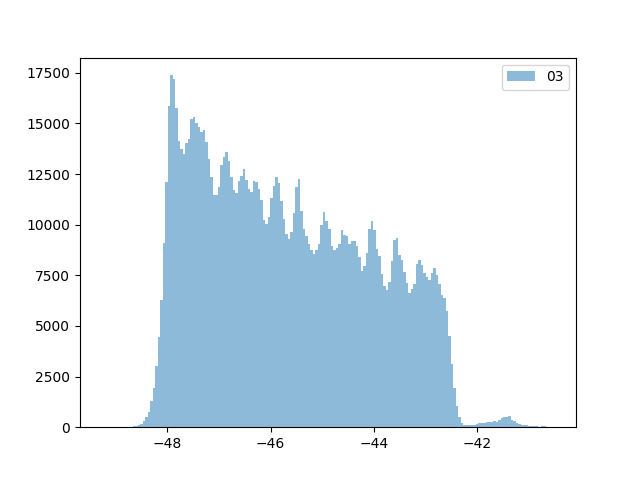

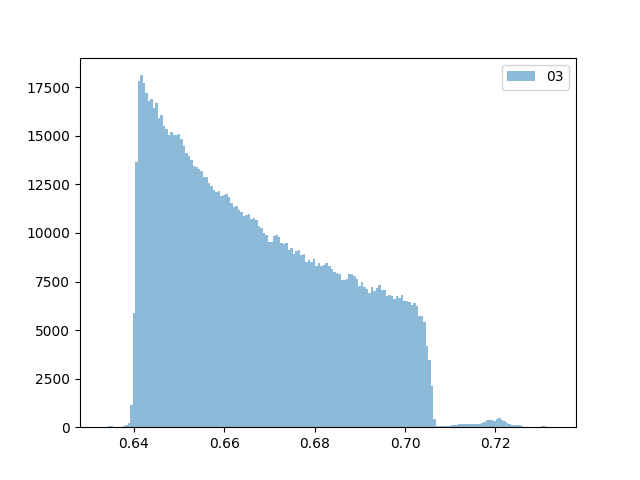

In [11]:
plt.figure()
res = np.load(f"data_T03_20240822121928_12.npy")[25000:]


bins = 180
plt.hist(


    np.rad2deg(np.angle(res)), bins=bins, label="03", alpha=0.5

)  # arguments are passed to np.histogram
plt.legend()


plt.show()

plt.figure()
bins = 180
plt.hist(
    np.abs(res), bins=bins, label="03", alpha=0.5
)  # arguments are passed to np.histogram
plt.legend()
plt.show()

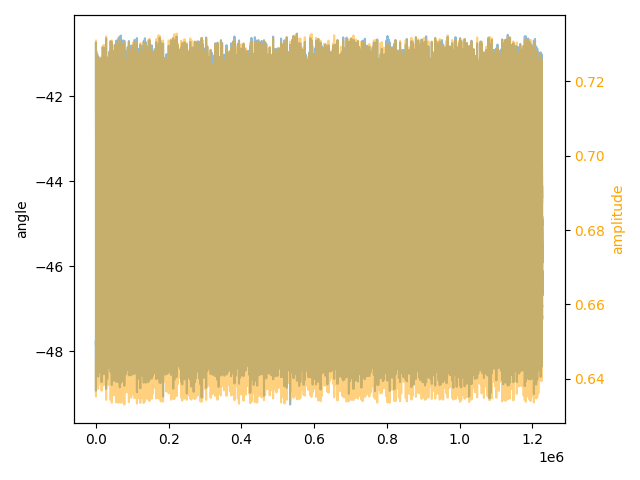

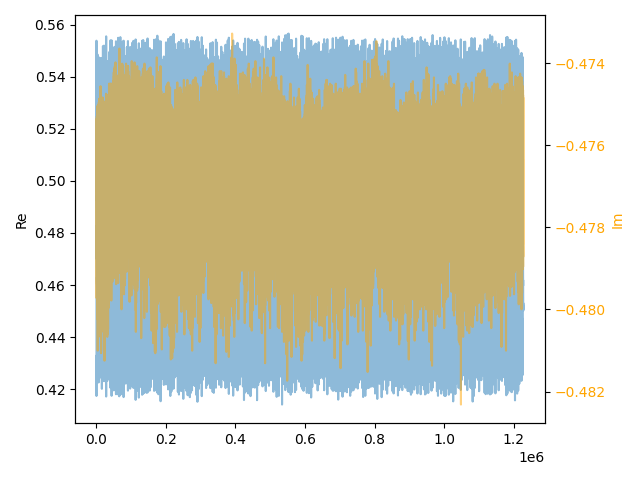

In [12]:
fig, ax1 = plt.subplots()


ax1.set_ylabel("angle")
ax1.plot(np.rad2deg(np.angle(res)), alpha=0.5)
ax2 = ax1.twinx()

ax2.set_ylabel("amplitude", color="orange")
ax2.plot(np.abs(res), color="orange", alpha=0.5)
ax2.tick_params(axis="y", labelcolor="orange")

fig.tight_layout()
plt.show()


fig, ax1 = plt.subplots()

ax1.set_ylabel("Re")
ax1.plot(np.real(res), alpha=0.5)
ax2 = ax1.twinx()

ax2.set_ylabel("Im", color="orange")
ax2.plot(np.imag(res), color="orange", alpha=0.5)
ax2.tick_params(axis="y", labelcolor="orange") 

fig.tight_layout()
plt.show()

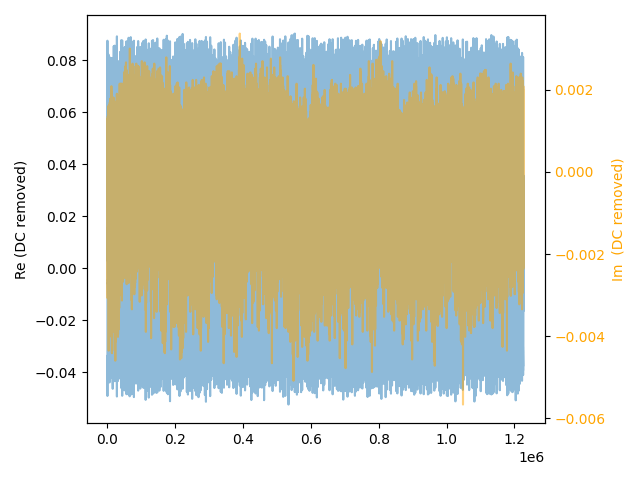

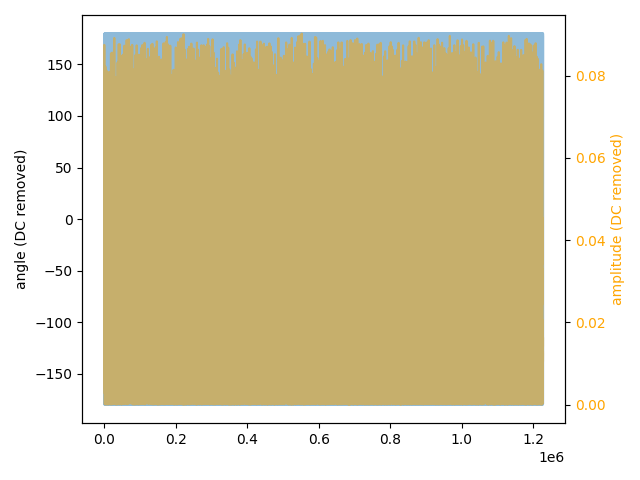

In [19]:
fig, ax1 = plt.subplots()

re = np.real(res) - np.mean(np.real(res))
imag = np.imag(res) - np.mean(np.imag(res))

ax1.set_ylabel("Re (DC removed)")
ax1.plot(re, alpha=0.5)
ax2 = ax1.twinx()

ax2.set_ylabel("Im  (DC removed)", color="orange")
ax2.plot(imag, color="orange", alpha=0.5)
ax2.tick_params(axis="y", labelcolor="orange")

fig.tight_layout()
plt.show()


fig, ax1 = plt.subplots()

iq_no_dc = re + 1j * imag

ax1.set_ylabel("angle (DC removed)")
ax1.plot(np.rad2deg(np.angle(iq_no_dc)), alpha=0.5)
ax2 = ax1.twinx()

ax2.set_ylabel("amplitude (DC removed)", color="orange")
ax2.plot(np.abs(iq_no_dc), color="orange", alpha=0.5)
ax2.tick_params(axis="y", labelcolor="orange")

fig.tight_layout()
plt.show()

-47.91070510025677
-45.863415


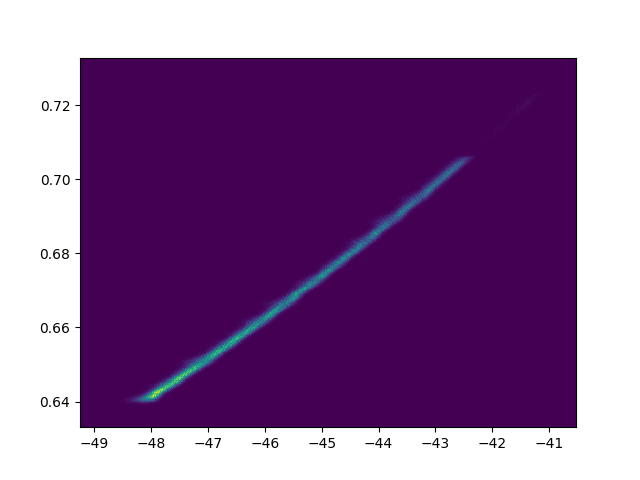

In [13]:
import numpy as np 

# res = np.load("data_T04_20240821134534_30.npy")[25000:]

valid_angles = np.angle(res);
valid_ampl = np.abs(res);


def circmedian(angs):
    return np.arctan2(np.median(np.sin(angs)), np.median(np.cos(angs)))


counts, xedges, yedges = np.histogram2d(valid_angles, valid_ampl, bins=720)
# https://stackoverflow.com/questions/60060017/how-do-i-find-the-bin-with-the-highest-count-using-np-hist2d
x_ind, y_ind = np.unravel_index(np.argmax(counts), counts.shape)
print(np.rad2deg((xedges[x_ind]+xedges[x_ind+1])/2))
print(np.rad2deg(circmedian(valid_angles)))

plt.figure()

plt.hist2d(np.rad2deg(valid_angles), valid_ampl, bins=720)
plt.show()

# x = valid_angles
# y = valid_ampl

# x_ind, y_ind = np.unravel_index(np.argmax(counts), counts.shape)
# print(f'The maximum count is {counts[x_ind][y_ind]:.0f} at index ({x_ind}, {y_ind})')
# print(f'The values are ({valid_angles[x_ind]}, {valid_ampl[y_ind]})')
# print(f'Between x values {xedges[x_ind]} and {xedges[x_ind+1]}')
# print(f'and between y values {yedges[y_ind]} and {yedges[y_ind+1]}')

# fig, ax = plt.subplots(ncols=1)

# ax.imshow(counts.T, origin='lower')
# ax.plot(x_ind, y_ind, 'or')
# ax.set_title('heatmap')

# plt.show()